# Load libraries

In [1]:
# !pip install gensim

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import gensim

# Load data

In [3]:
corpus = pd.read_excel('cleaned_corpus.xlsx')
corpus.head()

,title,link,date_published,text,source,like_count,reply_parent_id,cleaned_text
0,DOJ on 'slow' pace of Alice Guo case: 'We cann...,https://www.rappler.com/philippines/doj-respon...,2024-08-28 10:24:17,"MANILA, Philippines – The Department of Justic...",rappler,NaN,NaN,manila philippin depart justic doj defend stra...
1,Lawyer who notarized Alice Guo's counter affid...,https://www.rappler.com/philippines/lawyer-not...,2024-08-28 07:00:00,"CLARK FREEPORT, Philippines – The lawyer who n...",rappler,NaN,NaN,clark freeport philippin lawyer notar counter ...
2,Alice Guo and siblings fled Philippines by boat,https://www.rappler.com/philippines/alice-guo-...,2024-08-27 13:20:33,"MANILA, Philippines – Dismissed Bamban, Tarlac...",rappler,NaN,NaN,manila philippin dismiss bamban tarlac mayor a...
3,"Alice Guo's sister, Porac POGO staff to face S...",https://www.rappler.com/philippines/alice-guo-...,2024-08-27 10:03:09,"MANILA, Philippines – After an embarrassing la...",rappler,NaN,NaN,manila philippin embarrass laps let dismiss ma...
4,"Cassandra Ong, Sheila Guo in Congress custody ...",https://www.rappler.com/video/daily-wrap/augus...,2024-08-26 21:53:00,Here are today’s headlines – the latest news i...,rappler,NaN,NaN,today headlin latest news philippin around wor...


# Static Word Embedding

In [4]:
# Tokenize the text
corpus['tokenized_text'] = corpus['cleaned_text'].apply(lambda x: x.split())

In [5]:
display(
  corpus['cleaned_text'].head()
)

display(
  corpus['tokenized_text'].head()
)

0    manila philippin depart justic doj defend stra...
1    clark freeport philippin lawyer notar counter ...
2    manila philippin dismiss bamban tarlac mayor a...
3    manila philippin embarrass laps let dismiss ma...
4    today headlin latest news philippin around wor...
Name: cleaned_text, dtype: object

0    [manila, philippin, depart, justic, doj, defen...
1    [clark, freeport, philippin, lawyer, notar, co...
2    [manila, philippin, dismiss, bamban, tarlac, m...
3    [manila, philippin, embarrass, laps, let, dism...
4    [today, headlin, latest, news, philippin, arou...
Name: tokenized_text, dtype: object

In [6]:
model = gensim.models.Word2Vec(corpus['tokenized_text'],
                               vector_size=100,  # Dimension of the word vectors
                               min_count=1,    # Ignores all words with total frequency lower min_count
                               sg=0,           # Training algorithm: 0 for CBOW; 1 for Skip-gram
                               window=5,       # Maximum distance between the current & predicted word within a sentence
                               workers=4,      # Number of workers to use for training
                               epochs=10       # Number of iterations over the corpus
                               )

model.save('word2vec.model')

## Inspecting the word2vec

In [7]:
# Load the model
model = gensim.models.Word2Vec.load('word2vec.model')

# Get vectors from the model
vectors = model.wv

### Number of word vectors generated

In [8]:
# Number of word vectors generated (columns)
len(vectors)

4984

### List of words / tokens sorted by most frequent

In [9]:
# List of words / tokens sorted by most frequent
vectors.index_to_key
vectors.index_to_key[:5]  # Top 5 words

['pogo', 'philippin', 'game', 'thi', 'hous']

### Similarity between two words

In [10]:
# The similarity method returns a score of how similar the vectors of two words are. The closer the score is to 1, the higher the similarity. The closer to 0, the lower the similarity.
vectors.similarity('pogo', 'philippin')

0.9994341

### Distance between two words

In [11]:
# The distance method is the opposite of the similarity method; it returns how dissimilar the vectors of two words are. The closer the score is to 1, the higher the distance and the lower the similarity. The closer to 0, the lower the distance and the higher the similarity.
vectors.distance('pogo', 'philippin')

0.0005658864974975586

### Most similar & dissimilar to the given words

In [12]:
# The most_similar method returns words whose vectors are most similar to the given word.
vectors.most_similar('pogo', topn=10)

[('pagcor', 0.9997512698173523),
 ('raid', 0.9996460676193237),
 ('repres', 0.9996407628059387),
 ('licens', 0.999620258808136),
 ('country', 0.9995967149734497),
 ('onli', 0.9995924830436707),
 ('hi', 0.9995837211608887),
 ('becaus', 0.9995816349983215),
 ('ong', 0.9995750188827515),
 ('call', 0.9995748996734619)]

In [13]:
# Output the words whose vectors are most similar and dissimilar to the given words.
vectors.most_similar(
  positive=['pogo'],  # most similar to these words and
  negative=['scam'],  # most dissimilar to these word
  topn=10
)

[('interesting', 0.16616620123386383),
 ('drag', 0.1557491570711136),
 ('happi', 0.1513710916042328),
 ('quicker', 0.14822806417942047),
 ('declaration', 0.13932693004608154),
 ('drew', 0.13859139382839203),
 ('revil', 0.13590292632579803),
 ('bato', 0.13440978527069092),
 ('building', 0.13227206468582153),
 ('huliin', 0.12995615601539612)]

### Word that is least like the other given words

In [14]:
odd_one_out_words = "alice guo scam pogo mabuti"
odd_one_out_words = odd_one_out_words.split()
vectors.doesnt_match(odd_one_out_words)

'mabuti'

In [15]:
context_words = "ang"
context_words = context_words.split()
model.predict_output_word(context_words, topn=5)

[('building', 0.00022669745),
 ('boy', 0.0002258903),
 ('bukidnon', 0.00022314826),
 ('unlaw', 0.00022306928),
 ('popular', 0.00022290414)]

## Plotting vectors

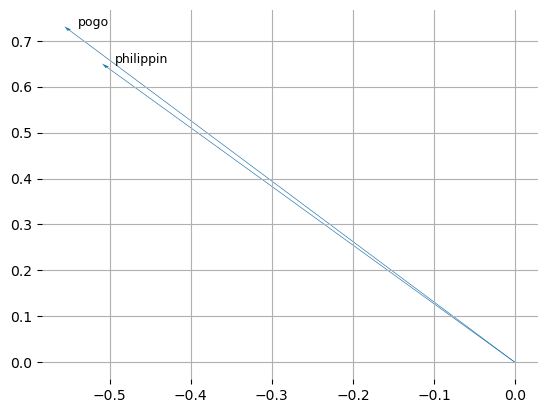

In [16]:
# Plot word vectors
def plot_vectors(vectors, words):
  # Create a figure and a 2D Axes
  fig, ax = plt.subplots()

  for word in words:
    # Get the vector for the word
    vector = vectors[word]

    # Plot the word near the arrow head
    ax.text(vector[0] + 0.01, vector[1] + 0.01, word, fontsize=9)
    # Plot the vector
    ax.arrow(
      0,                      # Start x
      0,                      # Start y
      vector[0],              # End x
      vector[1],              # End y
      # head_width=0.05,      # Arrow head width
      # head_length=0.1       # Arrow head length
      head_width=0.05 * 0.1,  # Arrow head width
      head_length=0.1 * 0.1,  # Arrow head length
      lw=0.01,                # Arrow line width
      # fc='r',                 # Arrow fill color
      # ec='r'                  # Arrow edge color
    )

  # Remove border around the plot
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.spines['left'].set_visible(False)

  plt.grid()

  # Display the plot
  plt.show()


plot_vectors(vectors, vectors.index_to_key[:2])

## Plotting with Principal Component Analysis (PCA)

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [26]:
# Words most similar to 'pogo'
vectors.most_similar('pogo', topn=5)
word_set1 = [word for word, score in vectors.most_similar('pogo', topn=5)]
word_set1

['pagcor', 'raid', 'repres', 'licens', 'country']

In [27]:
# Words most similar to 'scam'
vectors.most_similar('scam', topn=5)
word_set2 = [word for word, score in vectors.most_similar('scam', topn=5)]
word_set2

['one', 'like', 'becaus', 'year', 'thi']

In [28]:
words_to_viz = word_set1 + word_set2
words_to_viz

['pagcor',
 'raid',
 'repres',
 'licens',
 'country',
 'one',
 'like',
 'becaus',
 'year',
 'thi']

In [29]:
vecs_to_viz = [vectors[word] for word in words_to_viz]
vecs_to_viz

[array([-0.47959116,  0.65356815,  0.28662106, -0.06728511,  0.17016557,
        -1.0837996 ,  0.40725318,  1.3323326 , -0.35985592, -0.3302753 ,
        -0.5282165 , -0.9398999 , -0.2601202 ,  0.3856438 ,  0.13835685,
        -0.49666145,  0.08749243, -1.176895  ,  0.08416237, -1.3332736 ,
         0.5017787 ,  0.3484563 ,  0.35609066, -0.14202651, -0.21565905,
         0.10918961, -0.58208096, -0.49139124, -0.75568306,  0.08334679,
         0.6629704 ,  0.33338353, -0.09736993, -0.49815032, -0.283462  ,
         0.6308659 ,  0.00164408, -0.74004424, -0.63683885, -1.187405  ,
         0.1185706 , -0.60469544, -0.280802  ,  0.07506303,  0.7290824 ,
        -0.21330267, -0.77048904, -0.10328633,  0.26023796,  0.54925394,
         0.32380372, -0.5702563 , -0.27967674,  0.0759014 , -0.52333385,
         0.4554866 ,  0.35156563, -0.10159369, -0.82524514,  0.27799276,
         0.27871644,  0.39955613, -0.27554065, -0.06812518, -0.72907674,
         0.6254092 ,  0.17994043,  0.3989142 , -0.7

In [30]:
pca = PCA(n_components=2)
vecs_PCA = pca.fit_transform(vecs_to_viz)
vecs_PCA

array([[-0.74639774,  0.08730531],
       [ 1.35447615,  0.00942958],
       [-0.30340187,  0.08160693],
       [ 2.17949195,  0.00619392],
       [ 0.38897743, -0.02072712],
       [-1.00756854, -0.02006142],
       [-0.12726962, -0.04669002],
       [-0.93697455, -0.00573759],
       [ 1.14906863, -0.04450003],
       [-1.95040184, -0.04681956]])

In [34]:
vecs_PCA_df = pd.DataFrame(columns=['word', 'association', 'PC1', 'PC2'])

for idx in range(len(words_to_viz)):
  word = words_to_viz[idx]
  association = 'pogo' if word in word_set1 else 'scam'
  PC1 = vecs_PCA[idx, 0]
  PC2 = vecs_PCA[idx, 1]
  new_row = [word, association, PC1, PC2]

  vecs_PCA_df.loc[len(vecs_PCA_df)] = new_row

vecs_PCA_df

,word,association,PC1,PC2
0,pagcor,pogo,-0.746398,0.087305
1,raid,pogo,1.354476,0.009430
2,repres,pogo,-0.303402,0.081607
3,licens,pogo,2.179492,0.006194
4,country,pogo,0.388977,-0.020727
5,one,scam,-1.007569,-0.020061
6,like,scam,-0.127270,-0.046690
7,becaus,scam,-0.936975,-0.005738
8,year,scam,1.149069,-0.044500
9,thi,scam,-1.950402,-0.046820


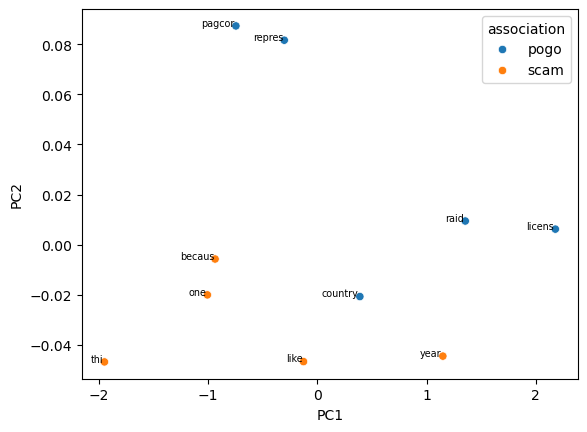

In [35]:
vecs_viz = sns.scatterplot(data=vecs_PCA_df, x='PC1', y='PC2', hue='association')
for idx in range(len(words_to_viz)):
  vecs_viz.text(vecs_PCA_df.PC1[idx] - 0.01, vecs_PCA_df.PC2[idx], vecs_PCA_df.word[idx], horizontalalignment='right',
                size='x-small', color='black', weight='light')
vecs_viz

plt.show()

In [38]:
def viz_associated_wordvecs(word1, word2, topn=5, model=vectors):
  word_set1 = [model.most_similar(word1, topn=topn)[idx][0] for idx in range(topn)]
  word_set2 = [model.most_similar(word2, topn=topn)[idx][0] for idx in range(topn)]
  words_to_viz = word_set1 + word_set2
  vecs_to_viz = [model[word] for word in words_to_viz]

  pca = PCA(n_components=2)
  vecs_PCA = pca.fit_transform(vecs_to_viz)
  vecs_PCA_df = pd.DataFrame(columns=['word', 'association', 'PC1', 'PC2'])

  for idx in range(len(words_to_viz)):
    word = words_to_viz[idx]
    association = word1 if word in word_set1 else word2
    PC1 = vecs_PCA[idx, 0]
    PC2 = vecs_PCA[idx, 1]
    new_row = [word, association, PC1, PC2]
    vecs_PCA_df.loc[len(vecs_PCA_df)] = new_row

  vecs_viz = sns.scatterplot(data=vecs_PCA_df, x='PC1', y='PC2', hue='association')

  for idx in range(len(words_to_viz)):
    vecs_viz.text(vecs_PCA_df.PC1[idx] - 0.01, vecs_PCA_df.PC2[idx], vecs_PCA_df.word[idx], horizontalalignment='right',
                  size='x-small', color='black', weight='light')
  return vecs_PCA_df

,word,association,PC1,PC2
0,also,man,-0.991234,-0.011983
1,would,man,-0.786873,-0.036173
2,two,man,0.125544,-0.031067
3,thi,man,-1.881650,-0.001795
4,ask,man,0.826600,-0.051709
5,back,woman,2.698211,0.016803
6,author,woman,0.328247,0.071117
7,becaus,woman,-0.867560,0.026599
8,the,woman,2.282659,-0.002766
9,hi,woman,-1.733944,0.020974


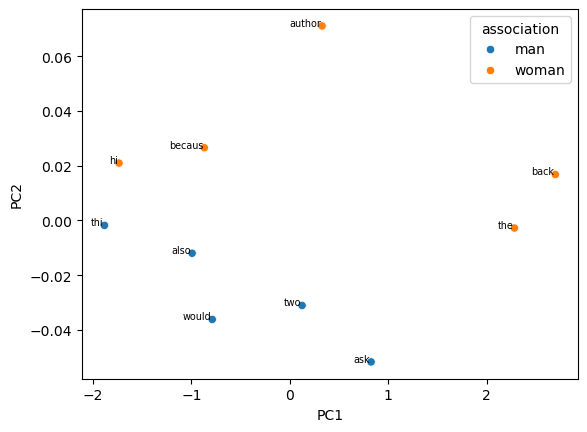

In [39]:
viz_associated_wordvecs('man', 'woman', topn=5, model=vectors)